In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
etc = pd.read_csv('daum_dataframe.csv',encoding = 'utf-8')

In [3]:
len(etc)

490

In [4]:
etc.head()

,Unnamed: 0,title,contents
0,0,"한국금융지주 ""카카오뱅크 주식 247억원 추가 취득""",사진=한국투자증권) [서울=뉴시스] 유자비 기자 = 한국금융지주가 인터넷전문은행 카...
1,1,"카카오게임즈 ""계열사 카카오브이엑스 주식 500억원에 추가취득""",코스닥 상장사 카카오게임즈는 골프관련 소프트웨어 개발 및 공급 계열사 카카오브이엑스...
2,2,"카카오 주식 매수의견 유지, ""모빌리티와 일본 웹툰사업 호조 지속""",카카오 주가가 오를 것으로 예상됐다. 자회사 카카오모빌리티와 일본 웹툰서비스 피코마...
3,3,"한국금융지주, 카카오뱅크 주식 104만 여주 취득","[초이스경제 최미림 기자] 한국금융지주는 4일 ""카카오뱅크의 주식 104만8979주..."
4,4,"카카오 ""카카오뱅크 주식 1676억원에 추가취득""",카카오는 계열사인 카카오뱅크의 주식 713만3061주를 약 1676억원에 추가 취득...


In [5]:
etc2 = list(etc.title)

etc2[0:2]

['한국금융지주 "카카오뱅크 주식 247억원 추가 취득"', '카카오게임즈 "계열사 카카오브이엑스 주식 500억원에 추가취득"']

In [6]:
from string import punctuation
def strip_punctuation(s):
    return ''.join(c for c in s if c not in punctuation)

clean_title = []
for sent in etc2:
    clean = strip_punctuation(sent)
    clean_title.append(clean)
    
clean_title[0:1]

['한국금융지주 카카오뱅크 주식 247억원 추가 취득']

In [7]:
from konlpy.tag import Kkma
kkma = Kkma()

In [8]:
import time
import datetime
start = time.time()

In [9]:
dataset = []
for i in range(len(clean_title)) :
    dataset.append(kkma.nouns(re.sub('[^가-힣a-zA-Z\s]', '', clean_title[i])))

sec = time.time()-start
times = str(datetime.timedelta(seconds = sec)).split(".")
times = times[0]
print(times)

0:00:33


In [10]:
clean_title2 = []
for i in range(len(clean_title)) :
    clean_title2.append(re.sub('카카오',' ',clean_title[i]))
clean_title3 = []
for i in range(len(clean_title2)):
    clean_title3.append(re.sub('주식', ' ', clean_title2[i]))
clean_title4 = []
for i in range(len(clean_title3)):
    clean_title4.append(re.sub('민영화', ' ', clean_title3[i]))
clean_title5 = []
for i in range(len(clean_title4)):
    clean_title5.append(re.sub('너무', ' ', clean_title4[i]))
clean_title6 = []
for i in range(len(clean_title5)):
    clean_title6.append(re.sub('요즘', ' ', clean_title5[i]))
clean_title7 = []
for i in range(len(clean_title6)):
    clean_title6.append(re.sub('돌림판', ' ', clean_title6[i]))

In [44]:
!pip install gensim

In [11]:
from gensim import corpora, models
import gensim

In [13]:
high_score_reviews = dataset

In [14]:
high_score_reviews = [[y for y in x if not len(y) == 1]
                     for x in high_score_reviews]
dictionary = corpora.Dictionary(high_score_reviews)
corpus = [dictionary.doc2bow(text) for text in high_score_reviews]

In [15]:
import matplotlib.pyplot as ply
from gensim.models import CoherenceModel

coherence_values=[]
for i in range(2,15):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = dictionary)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts = high_score_reviews, dictionary=dictionary,topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

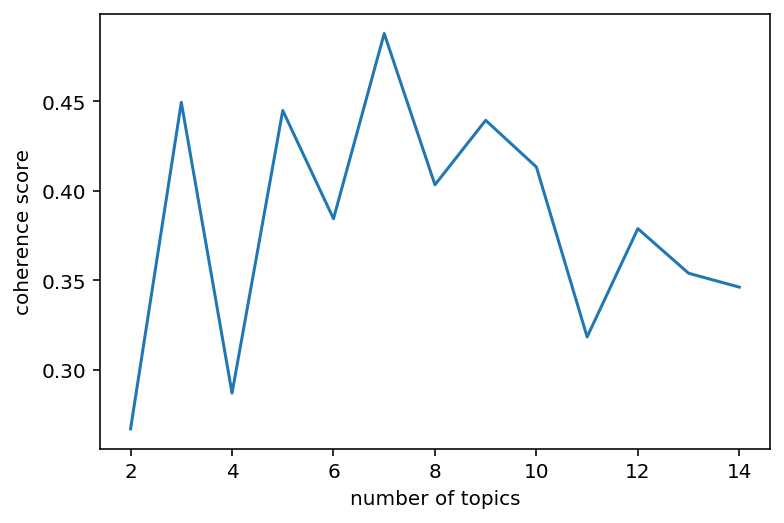

In [16]:
x = range(2,15)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [17]:
perplexity_values = []
for i in range(2,20):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

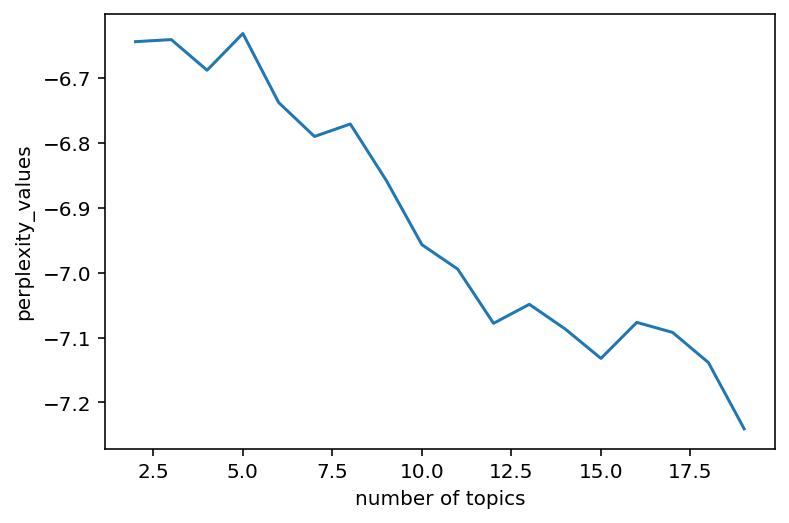

In [18]:
x=range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity_values")
plt.show()

In [25]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=9, alpha=0.1, id2word = dictionary)

In [26]:
ldamodel.print_topics(num_words=10)

[(0,
  '0.066*"카카오" + 0.036*"뱅크" + 0.035*"카카오뱅크" + 0.025*"투자" + 0.019*"주식" + 0.016*"유상" + 0.016*"증자" + 0.012*"유상증자" + 0.012*"유치" + 0.011*"펀드"'),
 (1,
  '0.058*"카카오" + 0.042*"주식" + 0.020*"뱅크" + 0.019*"카카오뱅크" + 0.015*"증권" + 0.010*"최고" + 0.010*"범수" + 0.010*"게임" + 0.010*"코스피" + 0.010*"코스"'),
 (2,
  '0.042*"카카오" + 0.026*"주식" + 0.016*"증권" + 0.011*"미국" + 0.011*"키움증권" + 0.011*"이벤트" + 0.010*"미국주식" + 0.010*"내년" + 0.010*"뱅크" + 0.009*"돌림판"'),
 (3,
  '0.051*"카카오" + 0.044*"주식" + 0.021*"김범수" + 0.021*"범수" + 0.013*"의장" + 0.011*"올해" + 0.009*"재산" + 0.009*"증권" + 0.009*"시장" + 0.009*"주식재산"'),
 (4,
  '0.063*"주식" + 0.032*"카카오" + 0.012*"증권" + 0.011*"매수" + 0.011*"미국주식" + 0.011*"돌림판" + 0.011*"당첨" + 0.011*"키움증권" + 0.011*"즉석" + 0.011*"이벤트"'),
 (5,
  '0.050*"카카오" + 0.025*"카카오게임즈" + 0.024*"게임" + 0.022*"주식" + 0.014*"스톡" + 0.014*"스톡옵션" + 0.014*"직원" + 0.014*"옵션" + 0.012*"금융" + 0.012*"증권"'),
 (6,
  '0.059*"카카오" + 0.022*"뱅크" + 0.020*"카카오뱅크" + 0.016*"투자" + 0.015*"주식" + 0.012*"추가" + 0.012*"증권" + 0.010*"억원" + 0.010*"금융" + 0

In [24]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.020514 -0.068806       1        1  17.882528
5      0.136497  0.069390       2        1  15.404873
7     -0.108546  0.023007       3        1  14.417517
1      0.010077  0.066035       4        1  11.937934
6      0.099248 -0.097631       5        1  11.483606
4      0.008654  0.051823       6        1  10.869628
2     -0.046165 -0.099212       7        1   9.702143
3     -0.079252  0.055393       8        1   8.301761, topic_info=      Term       Freq      Total Category  logprob  loglift
58      증권  45.000000  45.000000  Default  30.0000  30.0000
222     올해  14.000000  14.000000  Default  29.0000  29.0000
8    카카오뱅크  47.000000  47.000000  Default  28.0000  28.0000
1       뱅크  53.000000  53.000000  Default  27.0000  27.0000
48      의무  12.000000  12.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
578    코스피   2.148452  14.439322   Topic8  -5.0784   0.5835
9       한국   2.130956  14.835999   Topic8  -5.0866   0.5482
8    카카오뱅크   2.148469  47.385445   Topic8  -5.0784  -0.6049
18      매수   1.460950  10.405380   Topic8  -5.4640   0.5255
185    외국인   1.460928   4.304581   Topic8  -5.4641   1.4081

[501 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
529       4  0.880084    가동
530       4  0.880047  가동하나
154       1  0.737365    가치
154       8  0.163859    가치
562       1  0.341700    간편
...     ...       ...   ...
419       4  0.880031   현대차
1007      3  0.852831    형제
28        3  0.642820    호조
465       8  0.467061    회피
179       7  0.642254    후보

[842 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 8, 2, 7, 5, 3, 4])

In [34]:
pyLDAvis.save_html(vis, 'topicmodeling-daum_kakao.html')

In [44]:
kk = ldamodel.show_topic(10, topn=80000)
type(ldamodel.show_topic)
kk2 = pd.DataFrame(kk)
kk2.head(3)

,0,1
0,카카오,0.028184
1,뱅크,0.020575
2,금융,0.018027


In [38]:
kk2.to_csv('top5.csv', encoding="euc-kr")

In [43]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()
    
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list
        doc = sorted(doc, key =lambda x: (x[1]), reverse= True)
        
        
        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index = True)
            else:
                break
    return(topic_table)

In [44]:
topictable = make_topictable_per_doc(ldamodel, corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서번호', '가장 비중이 높은 토픽', '가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

,문서번호,가장 비중이 높은 토픽,가장 높은 토픽의 비중,각 토픽의 비중
0,0,5.0,0.9603,"[(5, 0.9603083)]"
1,1,4.0,0.9418,"[(0, 0.011629428), (1, 0.011629567), (2, 0.011..."
2,2,4.0,0.5805,"[(4, 0.58051276), (5, 0.3900697)]"
3,3,1.0,0.9569,"[(1, 0.9568874)]"
4,4,5.0,0.8611,"[(0, 0.027788874), (1, 0.027786823), (2, 0.027..."
5,5,0.0,0.9528,"[(0, 0.9528217)]"
6,6,1.0,0.7475,"[(0, 0.01041821), (1, 0.7474807), (2, 0.010418..."
7,7,0.0,0.5267,"[(0, 0.52671385), (1, 0.420642), (2, 0.0131602..."
8,8,4.0,0.7866,"[(0, 0.01163), (1, 0.16686413), (2, 0.01162921..."
9,9,3.0,0.9342,"[(0, 0.013159871), (1, 0.01315929), (2, 0.0131..."


In [45]:
topictable.to_csv("토픽테이블.csv", encoding = "euc-kr", index = False)